## 1. Código para obtener la anomalía sintética de los tres cilindros

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

Text(0,0.5,'g(mgal)')

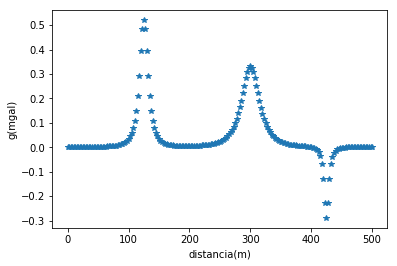

In [8]:


#p =np.array([1500,10,11,125,1000,20,22.5,300,-1000,5,6,425])
p =np.array([1000,20,22.5,300,-1000,5,6,425,1500,10,11,125])
x=np.linspace(0,500,201)
#p =np.array([1500,10,11,125])
#p =np.array([1000,20,22.5,300])
#p =np.array([-1000,5,6,425])
gamma=6.6673e-5
gcalc = np.zeros((201,))
sintetica = np.zeros(len(x))

for i in np.arange(len(x)):
    k=0
    for j in np.arange(3):
        sintetica[i] =  sintetica[i] + 2*np.pi*gamma*np.power(p[1+k],2)*p[0+k]*p[2+k]/ np.power((( x[i] - p[3+k])**2 + (p[2+k])**2),1.5)
        k=k+4
plt.plot(x,sintetica,'*')
#plt.plot(anomalia[0:100])
plt.xlabel("distancia(m)")
plt.ylabel("g(mgal)")

## 2. Aplicación de PSO a la anomalía sintética de los tres cilindros

A continuación se brinda un breve resumen de las variables y subrutinas en las que consiste el programa:

###  Variable tipo objeto "swarm"

Para hacer más fácil la implementación de PSO a nuestro problema, se generó una variable tipo objeto denominada "swarm", la cual almacena lo siguiente: 

entero:

    n= tamaño de la poblacion

    dim = numero de parametros a optimizar

    modsize = tamaño del modelo (numero de datos de la anomalia)

reales:

    minerr = error mínimo encontrado hasta ahora en todo el enjambre

matrices:
    
    pob(n,dim) = posiciones de cada una de las partículas
    
    bestpob(n,dim)=almacena la mejor posición de cada poblador hasta el momento
    
    vel(n,dim)= almacena la velocidad actual de cada poblador en cada dirección posible 
    
    rango(n,2)= Almacena el rango de búsqueda de cada parámetro, rango(i,1)= Límite inferior
    
    Rango(i,2)=limite superior
    
    modcalc(n,modsize)=almacena la anomalía generada por cada poblador

vectores:

    
    gbest(dim)=almacena el mejor modelo global
    
    parterr(n)=almacena el error minimo que ha encontrado cada poblador hasta el momento

### Subrutina pini_obj

Esta función inicializa todas las variables necesarias para ejecutar el algoritmo,
genera un enjambre con las características definidas por el usuario 
(tamaño del enjambre y # de parámetros).
Inicializa el vector de Velocidades el cual es necesario para poder mover las partículas.

parametros de entrada: 

    n = numero de partículas que se desea tenga el enjambre n

    range= vector en el que se indican los valores máximos y minimos de búsqueda para cada

    parámetro, debe de ser de diemsnion (dim,2): dim=# de parámetros 

    range(i,1)=Valor minimo aceptable para el parametro i

    range(i,2)=Valor minimo aceptable para el parametro i

    sw= Variable tipo enjambre donde se almacenará toda la información de los modelos



parametros de salida:
    
    n=numero de particulas

    dim = parametros por particula

    pob=arreglo que almacena la posición de cada poblador de dimensiones (n,dim)

    bestpob = Arreglo que almacena la mejor posición para cada poblador, dimensiones (n,dim)

       vel = Arreglo que almacena la velocidad en cada dimension para cada poblador, dimensiones (n,dim) 

    rango = arreglo que almacena los límites superior en inferior para cada parámetro, dimensiones (dim,2) 

    gbest = Vector que almmacena el mejor modelo (parámetros de los cilindros) global ,dimensiones (dim) 

    parterr = Arreglo que almacena el error minimo para cada partícula, dimensiones (n) 

    minerr = Valor que almacena el error actual del mejor modelo hasta el momento

### Subrutina  swarmerr
Se trata de una subrutina de calculo del error.

Esta función calcula el error de cada modelo y lo compara con el error global y local actualizando los modelos y valores de error en caso de ser necesario.

Parametros de entrada : 
    sw tipo enjambre con modelos previamente calculados

    func = Anomalía de la cual se busca encontrar los parámetros

Parametros de salida :

    sw Con valores de modelos y error actualizados

### Subrutina P_move_fobj

Es una función que realiza el movimiento de partículas.

Mueve cada partícula del enjambre según las ecuaciones propuestas por Eberheart para el PSO :

    v(i,d)=w*(v(i,d))+beta*(gb(d)-x(i,d))+alpha*(pbest(i,d)-x(i,d))

    x(i,d)=x(i,d)+v(i,d)

Parametros de entrada :  

    sw tipo enjambre con valores ya inicializados

    w = Peso inercial 

    alpha y beta = Parámetros de aprendizaje

Parametros de salida :

    p_move(dim,n)= Posiciones nuevas para cada partícula en el espacio "dim"-dimensional

### Input del programa

In [9]:
#minerr,pob,bestpob,vel,rango,modcalc,Tfobj,Tmodcalc,gbest,parterr,fobj,we
class swarm():
    def __init__(self,n,dim,minerr,pob,bestpob,vel,rango,modcalc,gbest,parterr):
        self.n = n
        self.dim = dim
        #self.modsize = modsize
        self.minerr = minerr
        self.pob = pob
        self.bestpob = bestpob
        self.vel = vel
        self.rango = rango
        self.modcalc = modcalc
        #self.Tfobj = Tfobj
        #self.modcalc = modcalc
        self.gbest = gbest
        self.parterr = parterr
        #self.fobj = fobj
        #self.we = we

In [10]:
def pini_obj(n,range_m):

    #n =n_pob
    #range_m=rango
    dim = range_m.shape[0]
    modsize = len(anomalia)
    minerr = 999999
    pob = np.random.random((n,dim))
    bestpob = np.zeros((n,dim))
    vel = np.zeros((n,dim))
    rango = range_m
    modcalc =np.zeros((n,modsize)) #modsize num datos de anomalia
    #Tfobj = Tfobj
    #Tmodcalc = Tmodcalc
    gbest = np.zeros((dim,))
    parterr = np.full((n,),np.inf)
    
    sw = swarm(n,dim,minerr,pob,bestpob,vel,rango,modcalc,gbest,parterr)
 
    sw.dim= dim
    sw.n=n    
    
    sw.pob=pob 
    sw.bestpob=bestpob
    sw.vel=vel
    sw.gbest=gbest
    sw.parterr = parterr
    sw.modcalc= modcalc
    sw.modsize=modsize
    #fobj = fobj
    #we = we
    np.random.random((n,dim)) 
    sw.rango = range_m

    for j in np.arange(dim):
        dimr = sw.rango[j,1]-sw.rango[j,0]
        for i in np.arange(n):
            sw.pob[i,j]= sw.pob[i,j]*dimr + sw.rango[j,0]
    sw.bestpob = sw.pob
   
    sw.parterr = np.full((n,),np.inf) 
    sw.minerr = np.inf 
    print("se han generado n pobladores de dimensiones dim :",n,dim)

    return sw





In [11]:
def swarmerr(sw,func):
#func=anomalia
    for i in np.arange(sw.n):
    #se guarda la anomalía calculada en una nueva variable
        f2 = sw.modcalc[i,:] #modelo calculado
    #se calcula el error l2 entre el modelo i y la anomalía
        errtemp = errn(func,f2,2)
    #se evalúa el error local y se actualiza la memoria de ser necesario
        if(errtemp<sw.parterr[i]):
            sw.parterr[i]=errtemp
            sw.bestpob[i,:] = sw.pob[i,:]
    #se evalúa el error global y se actualiza la memoria de ser necesario
        if(errtemp<sw.minerr):    
            sw.minerr = errtemp
            sw.gbest=sw.pob[i,:]
 

In [12]:
def errn(obs,calc,norm):
    #obs=anomalia
    #calc=sw.modcalc[i,:]
    #norm=2
    n=len(obs)
    i = len(calc)
    if(n!=i):
        print("tamanos distintos")
    else:
        suma = 0.0
        suma2 = 0.0
        for i in np.arange(n):
            suma = suma + np.abs(obs[i]-calc[i])**norm
            suma2 = suma2 + obs[i]**norm
    errn = suma**(1.0/norm)/suma2
    
    return errn    

In [13]:
def P_move_fobj(sw,w,alpha,beta):
#w=we
    n=sw.n
    dim = sw.dim
    randaux=np.random.random((n,dim,3))
    for i in np.arange(n):
        for j in np.arange(dim):
            temp = sw.pob[i,j]
            sw.vel[i,j]= sw.vel[i,j]*w + alpha*randaux[i,j,0]*(sw.gbest[j]-sw.pob[i,j])
            sw.vel[i,j]= sw.vel[i,j] + beta*randaux[i,j,1]*(sw.bestpob[i,j]-sw.pob[i,j])
            sw.pob[i,j]=sw.pob[i,j]+ sw.vel[i,j]
            dimrange = sw.rango[j,1] - sw.rango[j,0]
            if(sw.pob[i,j] < sw.rango[j,0]) or (sw.pob[i,j]>sw.rango[j,1]):
                sw.pob[i,j] = temp
                sw.vel[i,j] = -sw.vel[i,j]


## Programa principal:

In [14]:
#PARAMETROS DEL PROGRAMA
alpha = 1.5
beta = 1.2
we = 0.5
gamma=6.6673e-5
n_pob = 100
itera = 1000
prm = 10**(-20)
tol= 0.001


anomalia = sintetica
n = len(anomalia)
dobs=np.zeros((n,2))
matdcalc=np.zeros((n,2))
dobs[:,0] = x
dobs[:,1]= anomalia

#Límites para el dominio de búsqueda de densidad,radio y profundidad
rango=np.array([[1400,1600],[0,20],[0,20],[100,200],[900,1100],
        [10,30],[10,30],[220,320],[-1200,0],[0,10],[0,10],[300,500]]) #los rangos no estaban bien

In [16]:
sw=pini_obj(n_pob,rango)
d_c = anomalia
#aqui comienza el verdadero PSO
minerr=1
l=0
#archivo en el cual se escribira el error l2 obtenido en cada iteración:
file=open("salida.dat","w")



se han generado n pobladores de dimensiones dim : 100 12


In [256]:

#ciclo que controla el número de iteraciones según una tolerancia o bien numero máximo de iteraciones permitido
while minerr> tol and l<itera:   
#se copia la posición de cada partícula a una variable para hacer el cálculo de la anomalía
    m = sw.pob
    sw.modcalc=np.zeros((n_pob,n)) #es necesario reiniciar la variable cada iteración
#se calcula la anomalia por cada modelo, se podría paralelizar
    for w in np.arange(n_pob):
        for i in np.arange(n):
            k=0
            i
            for j in np.arange(3):
                sw.modcalc[w,i] = sw.modcalc[w,i]+ 2*np.pi*gamma*np.power(m[w,1+k],2)*m[w,0+k]*m[w,3+k]/np.power((np.power(( x[i] - m[w,3+k]),2) + m[w,2+k]**2),1.5)
                k=k+4
               
                
#Se evalua el error l2 de cada partícula respecto a la función objetivo
    swarmerr(sw,d_c)
#Una vez calculado el error, se mueven las partículas de posición de acuerdo a los parámetros preestablecidos
    P_move_fobj(sw,we,alpha,beta)
    minerr = sw.minerr
    file.write("%i %7.5f\n" % (l, minerr))
    
#se repite el ciclo hasta que se cumpla el número de iteraciones o la tolerancia, aumentando el contador en 1    
    l = l+1
    
file.close()

1.0538780878908136
0.7056395059082072
0.6167700744650183
0.5859352751656145
0.4443691413509355
0.4237474115024679
0.4019585584158723
0.38123490128338416
0.3260051176162316
0.32151328779377925
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846
0.29321694144739846


KeyboardInterrupt: 

Los parámetros de los tres cilindros que calculó la inversión son los siguientes:

In [257]:
sw.gbest

array([ 1.45279523e+03,  7.63289613e+00,  1.28055649e+01,  1.23728033e+02,
        9.16503846e+02,  1.04210689e+01,  2.95725738e+01,  3.04089439e+02,
       -4.49437772e+02,  2.42881393e-01,  7.30668319e+00,  3.58563216e+02])

In [258]:
minerr

0.29321694144739846

Graficamos el mejor modelo resultante:

In [259]:
mod_resultante = np.zeros(n)
for i in np.arange(n):
    k=0
    
    for j in np.arange(3):
        mod_resultante[i] = mod_resultante[i]+ 2*np.pi*gamma*np.power(sw.gbest[1+k],2)*sw.gbest[0+k]*sw.gbest[2+k]/np.power((np.power(( x[i] - sw.gbest[3+k]),2) + sw.gbest[2+k]**2),1.5)
        k=k+4

A continuación se muestra la gráfica del error obtenida contra el número de iteraciones:

Text(0,0.5,'error')

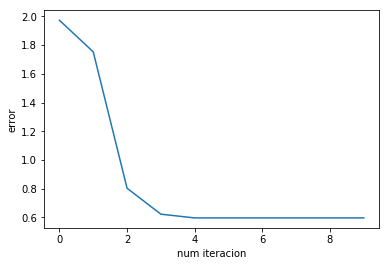

In [260]:
salida = np.loadtxt("salida.dat")
plt.plot(salida[0:10,0],salida[0:10,1])
plt.xlabel("num iteracion")
plt.ylabel("error")

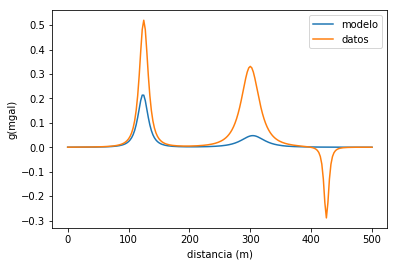

In [261]:
plt.plot(x,mod_resultante,label = "modelo")
plt.plot(x,anomalia,label = "datos")
plt.xlabel("distancia (m)")
plt.ylabel("g(mgal)")
plt.legend()
plt.show()